In [157]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load the original dataset
df = pd.read_csv("C://Users//hiba.abidelkarem//Downloads//heart_disease.csv")

rows_before_cleaning = df.shape[0]
# Display DataFrame information using info()
print("\nDataFrame info:")
print(df.info())
# Display statistical summary of the DataFrame using describe()
print("\nStatistical summary:")
print(df.describe(include='all'))
# Display initial rows, last rows, and a random sample of rows 
print("Initial rows:")
print(df.head())
print("\nLast rows:")
print(df.tail())
print("\nRandom sample:")
print(df.sample(5, random_state=1)) 



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

Statistical summary:
                id         age   sex    dataset            cp    trestbps  \
count   

In [158]:
#EDA Section

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

df = pd.read_csv("C://Users//hiba.abidelkarem//Downloads//heart_disease.csv")
df = df.drop(columns=['id', 'dataset'])# Drop unnecessary columns (id, dataset columns)
# Convert categorical columns to numeric
categorical_columns = {
    'sex': {'Female': 0, 'Male': 1},
    'cp': {'typical angina': 0, 'atypical angina': 1, 'non-anginal pain': 2, 'asymptomatic': 3},
    'fbs': {False: 0, True: 1},
    'restecg': {'normal': 0, 'lv hypertrophy': 1, 'st-t abnormality': 2},
    'exang': {False: 0, True: 1},
    'slope': {'upsloping': 0, 'flat': 1, 'downsloping': 2},
    'ca': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
    'thal': {'normal': 1, 'fixed defect': 2, 'reversable defect': 3}
}

for column, mapping in categorical_columns.items():
    df[column] = df[column].map(mapping)
df.rename(columns={'num': 'target'}, inplace=True)# Rename the target column (change it from num to target)
print("\nMissing values before cleaning:")
print(df.isnull().sum())
imputer = SimpleImputer(strategy='median')# Initialize the imputer to fill missing values with the median (for numerical features)
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=[object, 'category']).columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])# Impute missing values for numerical features
# Impute missing values for categorical features
for col in categorical_cols:
    if df[col].isnull().any():
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col].fillna(mode_value[0], inplace=True)
        else:
            print(f"No mode value found for column '{col}'")

rows_after_cleaning = df.shape[0]# Record the number of rows after cleanin
# Display numeric columns after filling missing values
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("\nNumeric columns:")
print(numeric_columns)
# Data summary after cleaning and normalization
print("\nData summary after cleaning and normalization:")
print(df.describe())
print(df.info())
# Save the cleaned data to a new CSV file
output_file = "C://Users//hiba.abidelkarem//Downloads//heart_disease_cleaned.csv"
df.to_csv(output_file, index=False)



Missing values before cleaning:
age           0
sex           0
cp          204
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

Numeric columns:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data summary after cleaning and normalization:
              age         sex          cp    trestbps        chol         fbs  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean    53.510870    0.789130    2.471739  131.995652  199.908696    0.150000   
std      9.424685    0.408148    0.963572   18.451300  109.040171    0.357266   
min     28.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     47.000000    1.000000    3.000000  120.000000  177.750000    0.000000   
50%     54.000000   

In [150]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import resample


# Resample the dataset to balance classes if needed
target_0 = df[df['target'] == 0]
target_1 = df[df['target'] == 1]
# Upsample minority class
target_1_upsampled = resample(target_1, replace=True, n_samples=len(target_0), random_state=42)
df_balanced = pd.concat([target_0, target_1_upsampled])# Combine the resampled data
# Split data into features and target
X = df_balanced.drop(columns=['target'])
y = df_balanced['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print(classification_report(y_test, y_pred))
    
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print("ROC AUC:", roc_auc)
    else:
        print("ROC AUC not available for this model")

# Models 
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "SVC": SVC(probability=True)
}

param_grids = {
    "LogisticRegression": {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']},
    "RandomForestClassifier": {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]},
    "GradientBoostingClassifier": {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 150]},
    "SVC": {'C': [0.1, 1, 10], 'kernel': ['rbf']}
}

# Perform GridSearchCV and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='f1_weighted')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Evaluating {model_name}...")
    evaluate_model(best_model, X_test, y_test)
    print("=" * 50)


Training LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.01, 'penalty': 'l2'}
Evaluating LogisticRegression...
              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75        82
         1.0       0.75      0.78      0.76        83

    accuracy                           0.76       165
   macro avg       0.76      0.76      0.76       165
weighted avg       0.76      0.76      0.76       165

ROC AUC: 0.8191301792535998
Training RandomForestClassifier...
Best parameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 200}
Evaluating RandomForestClassifier...
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.82        82
         1.0       0.81      0.86      0.83        83

    accuracy                           0.82       165
   macro avg       0.83      0.82      0.82       165
weighted avg       0.83      0.82      0.82       165

ROC AUC: 0.9193358801057891
Tr

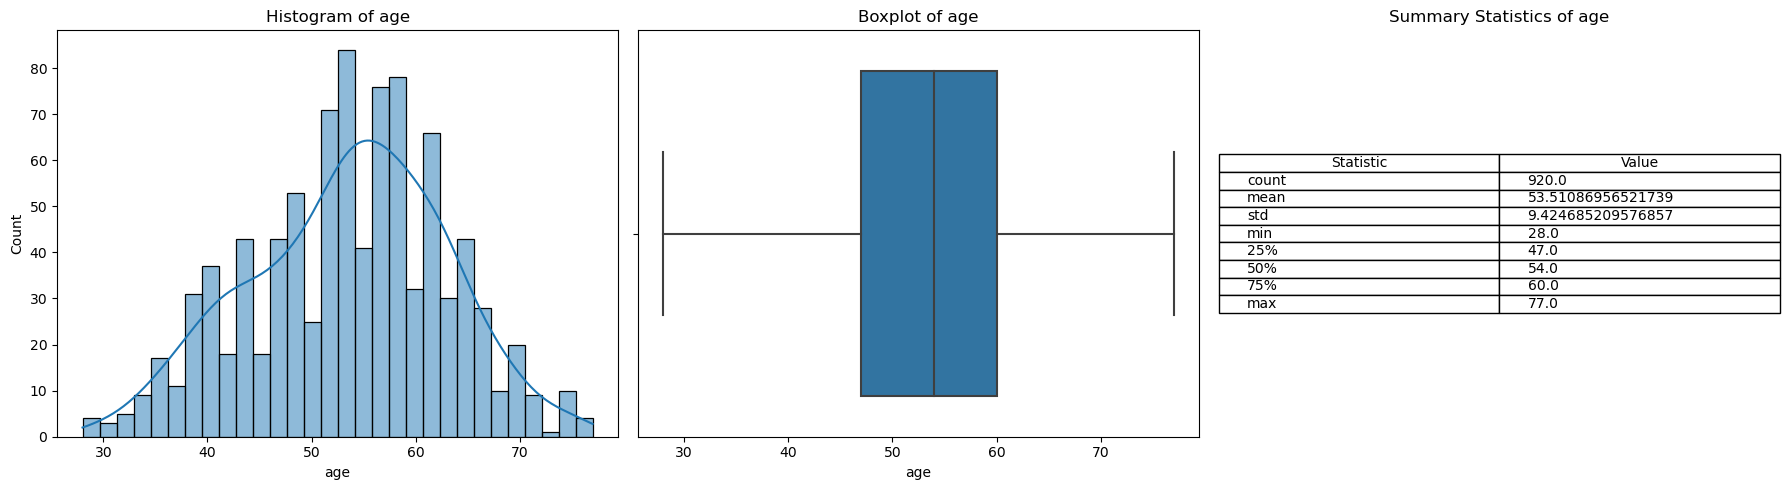

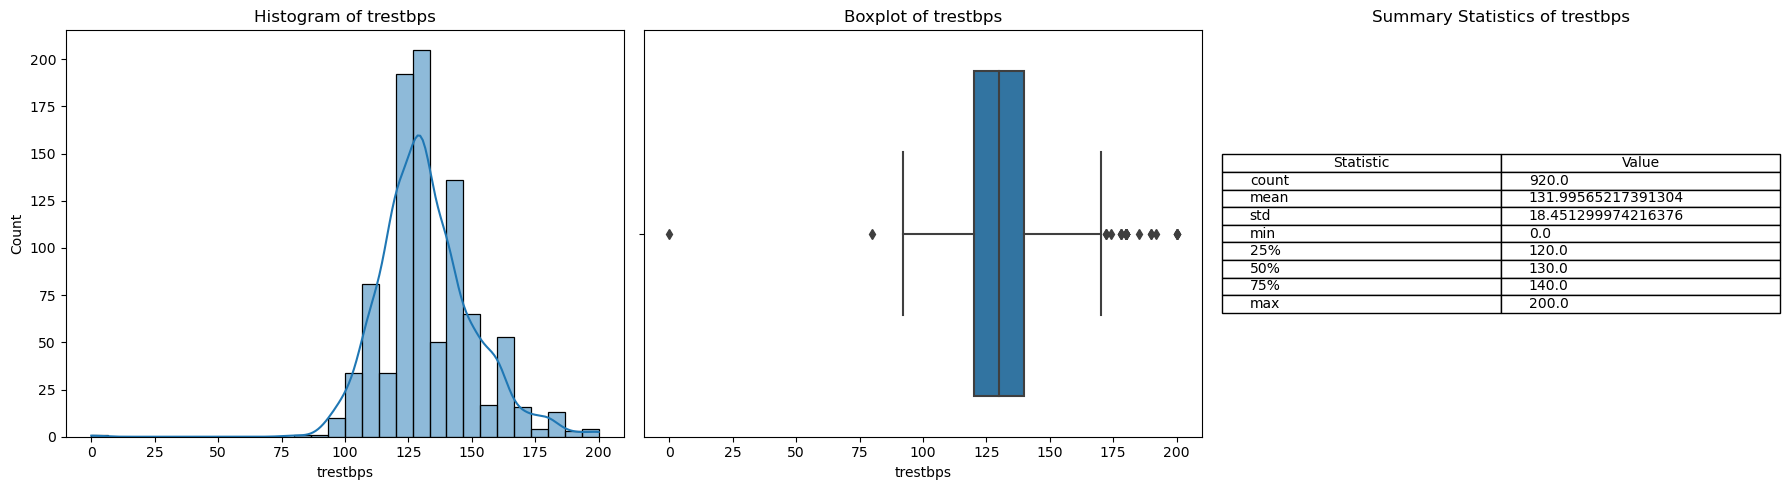

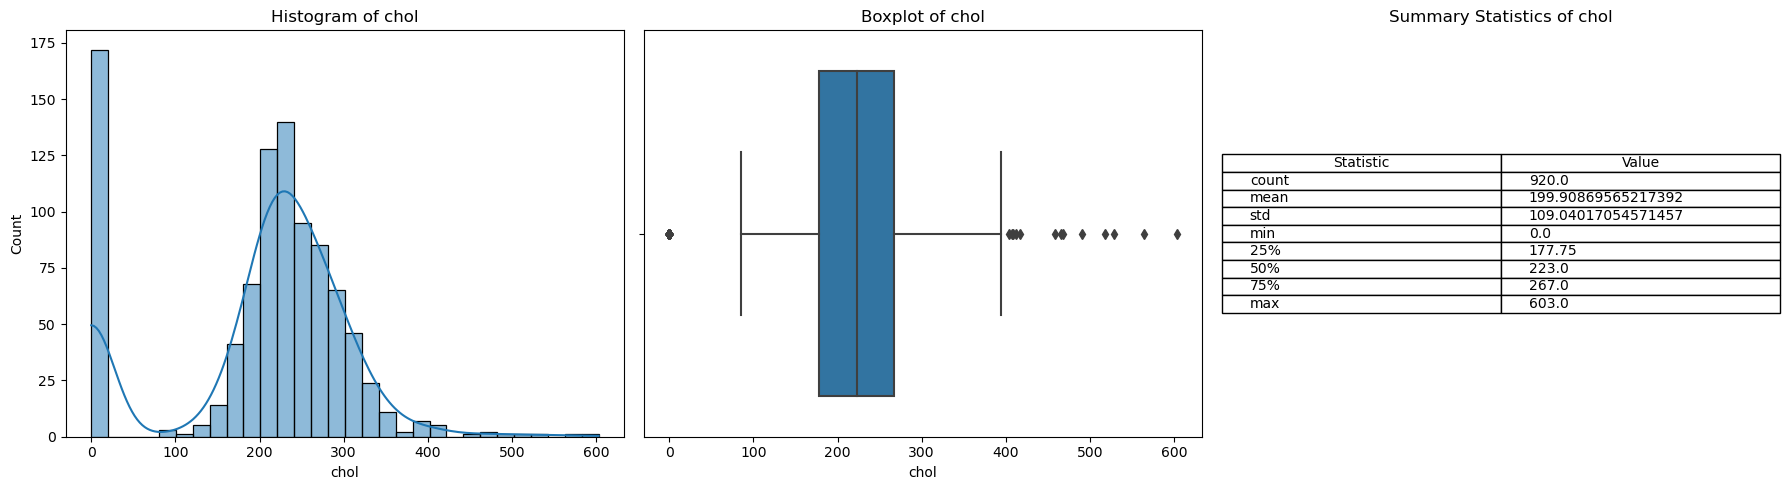

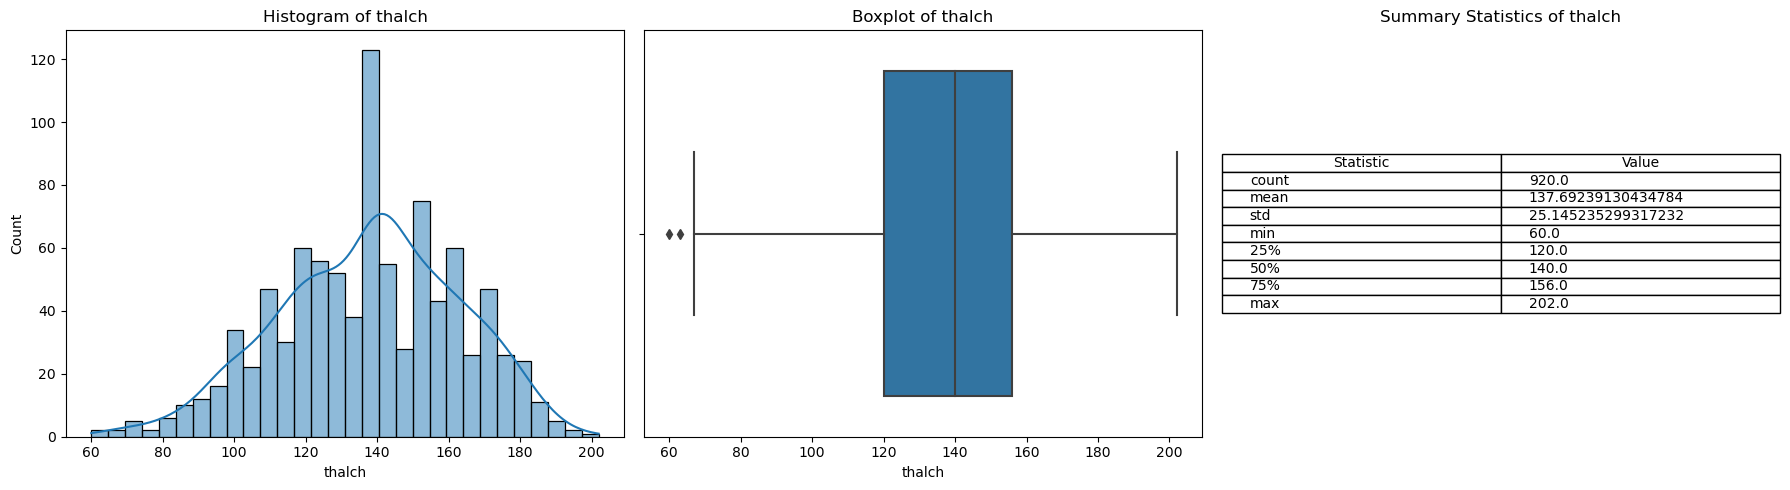

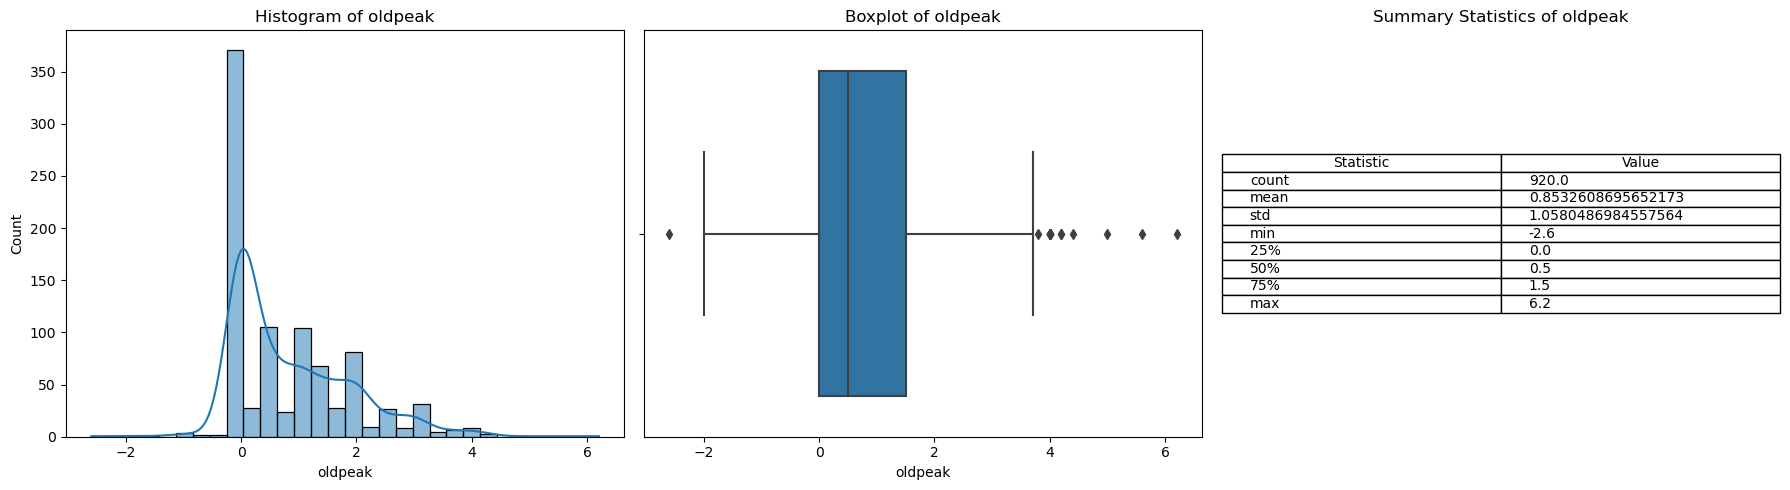

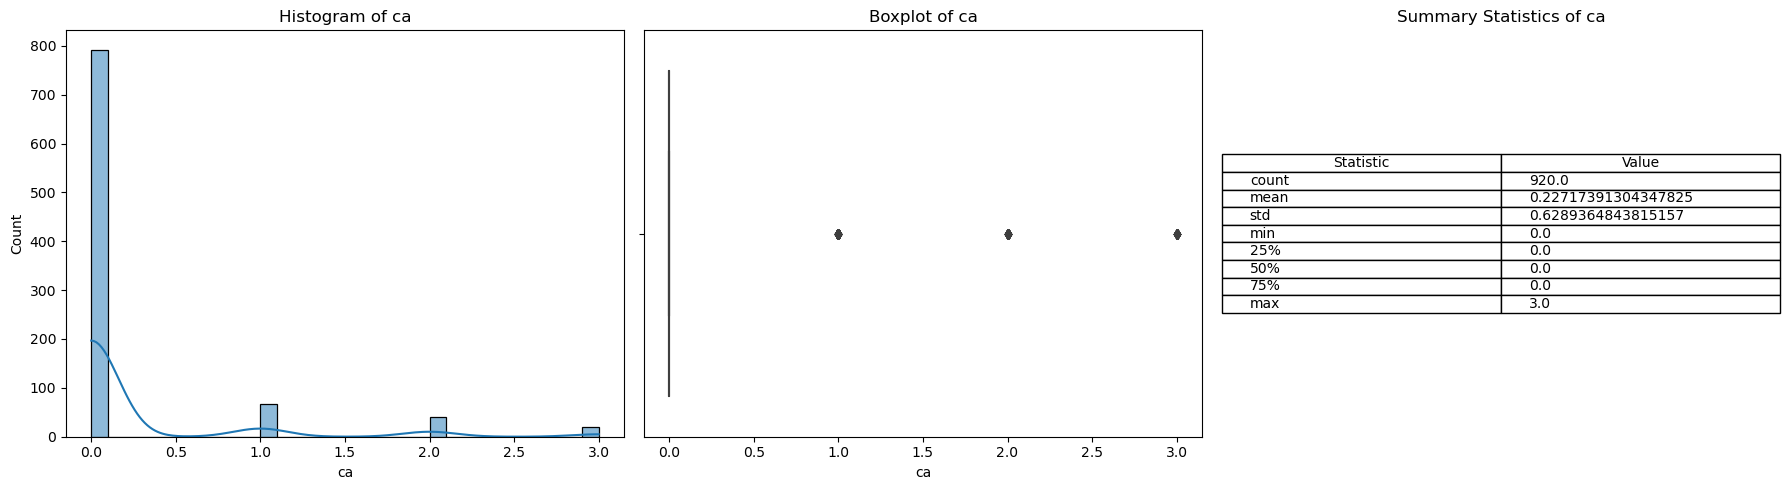

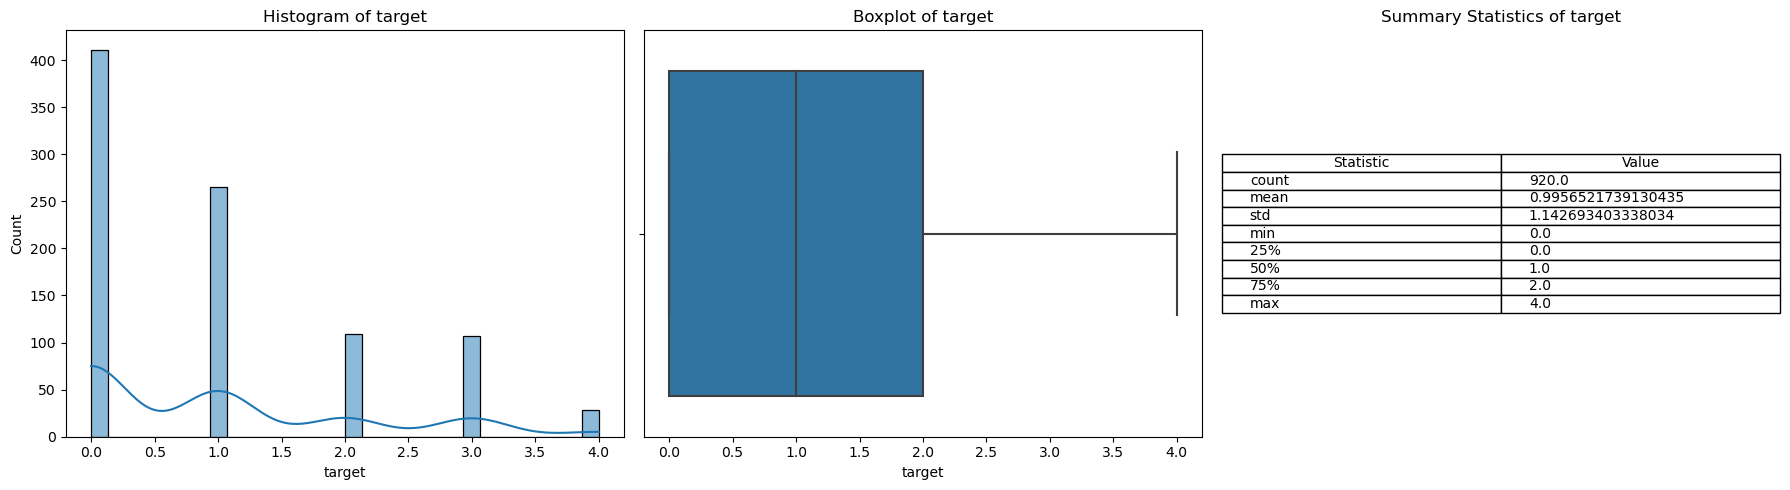

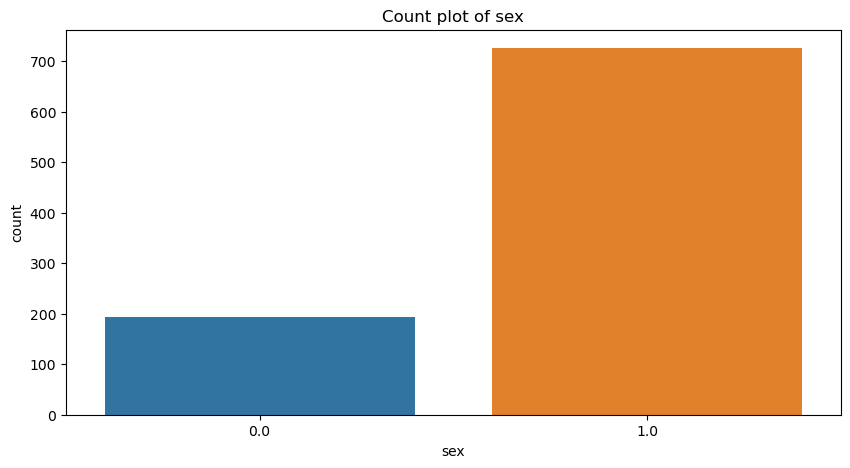

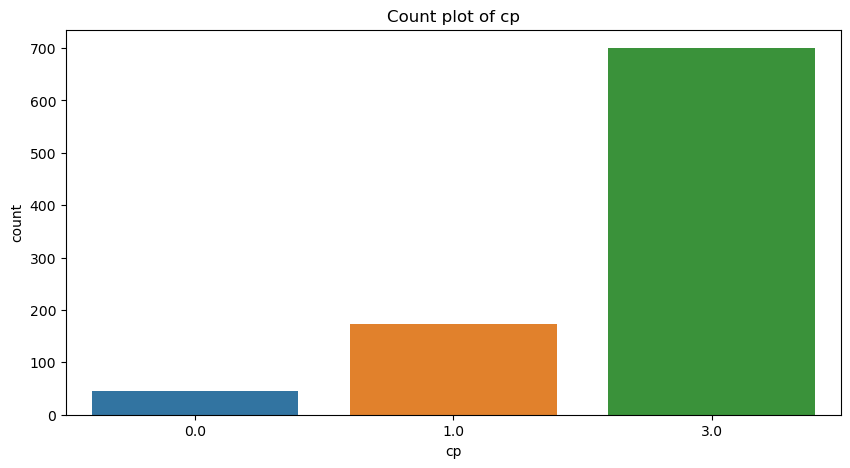

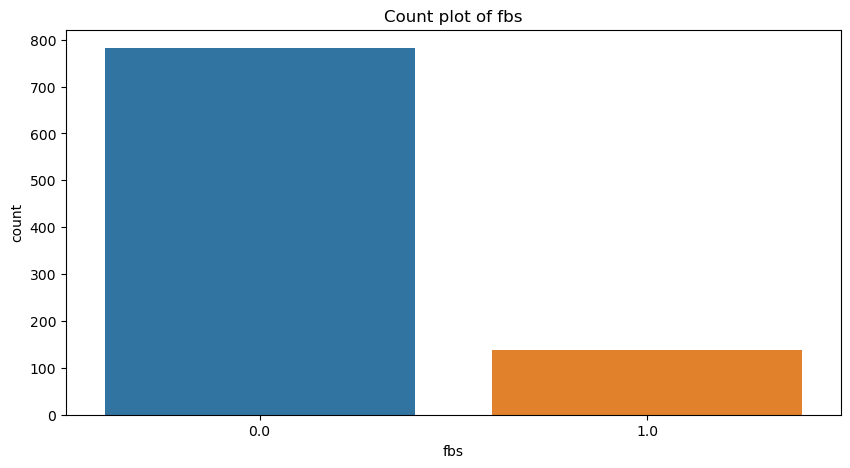

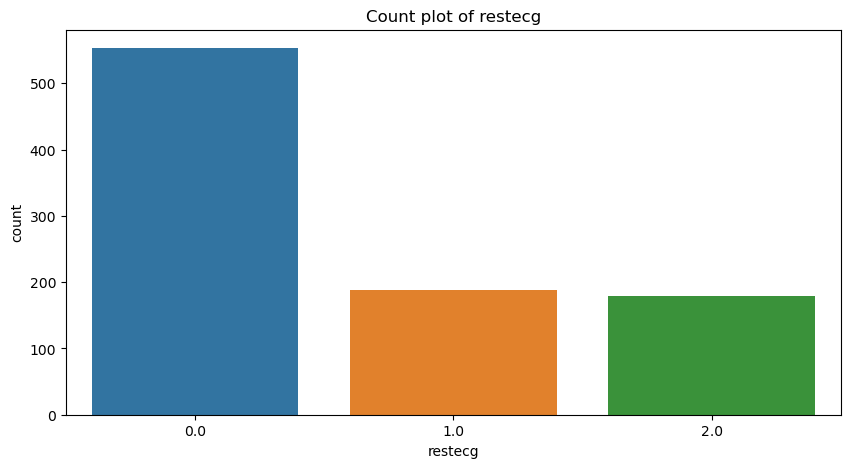

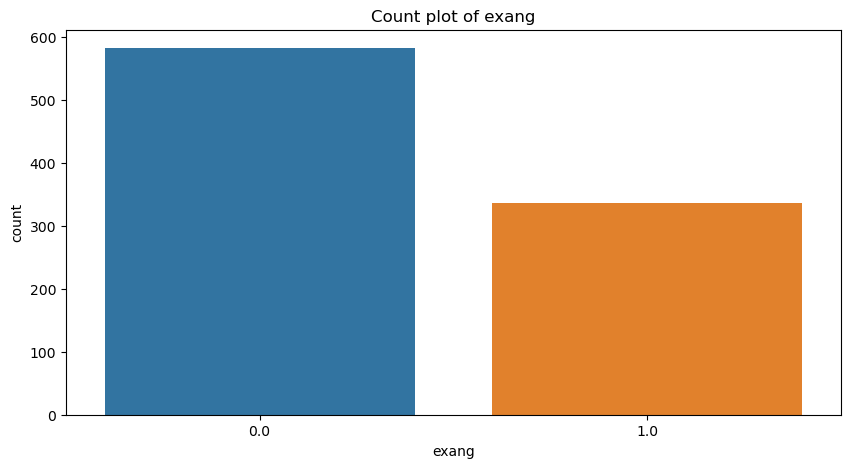

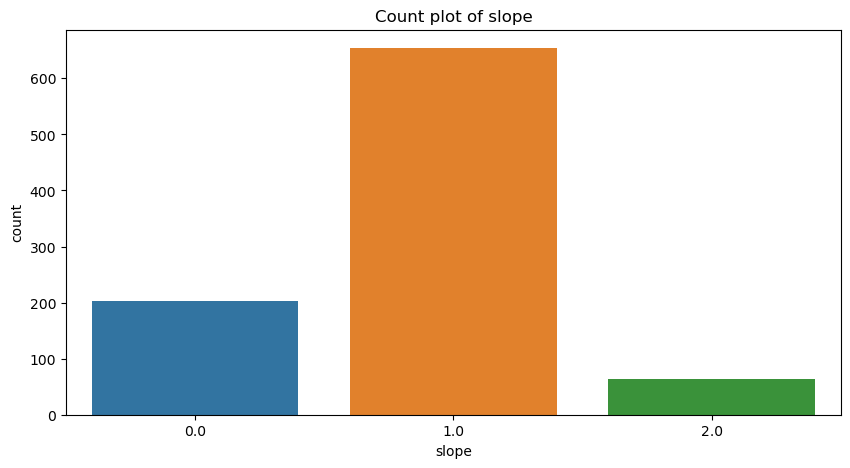

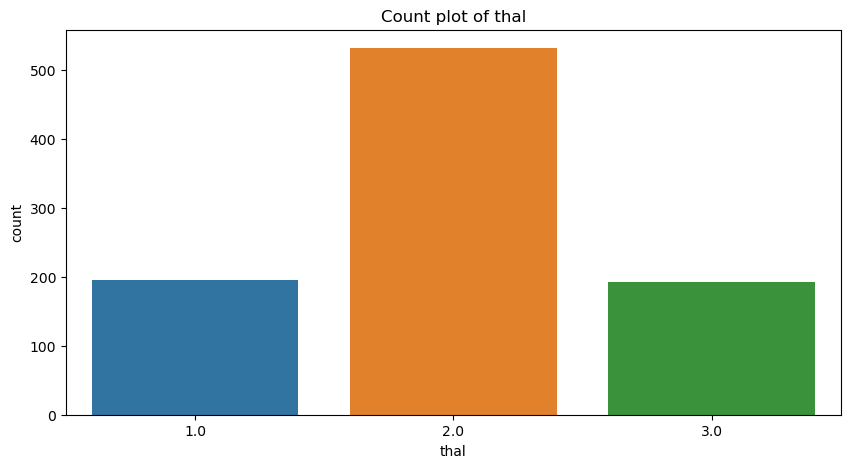

In [140]:
#Univariate Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned and normalized dataset
df = pd.read_csv("C://Users//hiba.abidelkarem//Downloads//heart_disease_cleaned.csv")
# specify the categorical columns 
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# perform univariate analysis
def plot_univariate_analysis(df):
    # Separate numerical and categorical columns
    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = [col for col in categorical_columns if col in df.columns]
    
    # Numerical features
    for col in num_cols:
        if col not in categorical_columns:  # to ensure it's not a categorical column
            plt.figure(figsize=(18, 5))
            
            # Histogram with KDE
            plt.subplot(1, 3, 1)
            sns.histplot(df[col], kde=True, bins=30)
            plt.title(f'Histogram of {col}')
            
            # Boxplot
            plt.subplot(1, 3, 2)
            sns.boxplot(x=df[col])
            plt.title(f'Boxplot of {col}')
            
            # Summary Statistics
            plt.subplot(1, 3, 3)
            plt.axis('off')
            summary_stats = df[col].describe()
            plt.table(cellText=summary_stats.reset_index().values,
                      colLabels=['Statistic', 'Value'],
                      cellLoc='left', loc='center')
            plt.title(f'Summary Statistics of {col}')
            
            plt.tight_layout()
            plt.show()
    
    # Categorical features
    for col in cat_cols:
        plt.figure(figsize=(10, 5))
        
        # Count plot
        sns.countplot(x=df[col])
        plt.title(f'Count plot of {col}')
        
        plt.show()

# univariate analysis
plot_univariate_analysis(df)


<div dir="rtl">
# Univariate Analysis:
## תובנות על ההתפלגות של משתנים נומריים:

1. **Age - גיל**:
ההתפלגות של הגיל נראית נורמלית בערך, עם ריכוז גבוה של גילאים סביב 50-60, כפי שנראה גם בהיסטוגרמה וגם בתיבת החציון (boxplot). אין ערכים חריגים (outliers) בולטים, שכן הגבולות של תיבת החציון (boxplot) מקיפים את רוב הערכים, ואין חריגים מחוץ לטווח השפמים.

2. **לחץ הדם במנוחה - (trestbps)**:
ההתפלגות של הלחץ הדם במנוחה (trestbps) נוטה לנורמלית עם ערכים מרוכזים בין 120 ל-140, והשיא סביב 130. קיימים מספר ערכים חריגים (outliers) מתחת ל-75 ומעל 175, כפי שנראה ב-boxplot.

3. **chol - רמת כולסטרול בדם**:
ההתפלגות של ערך הכולסטרול (chol) מוטה ימינה, עם ריכוז גבוה של ערכים סביב 200-250 כפי שנראה בהיסטוגרמה. קיימים ערכים חריגים (outliers) בצד הימני של התפלגות הכולסטרול, כפי שנראה בתרשים תיבת החציון, עם כמה ערכים החורגים מעל 400.

4. **thalach - דופק מרבי שהושג**:
ההתפלגות של הערך "thalach" היא נורמלית פחות או יותר, עם ריכוז גבוה של ערכים בטווח 120-160, כפי שנראה בהיסטוגרמה. קיימים ערכים חריגים נמוכים מתחת ל-80, כפי שנראה בתרשים תיבת החציון.

5. **Oldpeak - דיכאון מקטע ST יחסי למנוחה**:
הערך של oldpeak מתפלג בצורה חיובית עם רוב הערכים קרובים ל-0. קיימים מספר ערכים גבוהים יותר שנראים חריגים, במיוחד מעבר לערך 4 (נמצאים מחוץ לתחום הקופסה).

6. **ca - מספר כלי דם עיקריים שנצבעו**:
ההתפלגות של ca היא קטגוריאלית עם ערכים שלמים, כאשר רוב הדגימות נמצאות בערך 0. ישנם כמה ערכים חריגים, במיוחד הערך 3, המהווה נקודת חריג בקופסה.

7. **Target**:
גם כאן ההתפלגות היא קטגוריאלית, עם ערכים מ-0 עד 1. רוב הערכים הם 0, וישנן מספר דגימות בערכים גבוהים יותר. לא משתנים קטגוריים חריגים בקופסה.
</div>


<div dir="rtl">

## משתנים קטגוריאליים:

1. **מגדר**:
בדגימה יש קרוב ל-200 נשים וכמעט 700 גברים. זו התפלגות לא מאוזנת מבחינת מגדר, כאשר מספר הגברים גבוה משמעותית ממספר הנשים.

2. **CP**:
רוב המקרים הם מסוג 3.0 (כ-700 מקרים), עם מספר קטן יחסית של מקרים מסוג 0.0 ו-1.0. נראה כי כאב חזה מסוג 3.0 נפוץ בהרבה מהשאר, אך לא נראים ערכים חריגים יוצאי דופן.

3. **Fbs**:
ניתן לראות שקרוב ל-100 מקרים עם ערך 1 (כלומר רמת סוכר גבוהה מ-120 mg/dl), בעוד שבכ-800 מקרים רמת הסוכר נמוכה מ-120 mg/dl (ערך 0). רוב הנבדקים בדגימה זו לא סובלים מסוכר גבוה בצום.

4. **Restecg**:
הגרף מראה שיותר מ-500 מקרים נמצאו תקינים (0), כ-200 מקרים הראו היפרטרופיה של החדר השמאלי (1), וקצת פחות מ-200 מקרים הראו חריגות ST-T (2). כלומר, רוב המקרים מצביעים על ECG תקין.

5. **Exang**:
יותר מ-300 מקרים היו עם אנגינה בעקבות פעילות גופנית (ערך 1), בעוד שקצת פחות מ-600 מקרים לא סבלו מאנגינה לאחר פעילות גופנית (ערך 0). כלומר, רוב הנבדקים לא חוו אנגינה כתוצאה מפעילות גופנית.

6. **Slope**:
רוב המקרים מצביעים על שיפוע 1 במקטע ST בזמן מאמץ.

7. **Thal**:
ההתפלגות נראית שונה בין הקטגוריות, עם ריכוז גבוה יותר של ערכים בקטגוריה 2 (הקטגוריה הבינונית).

## סיכום:
מהגרפים ניתן לראות שיש שונות בין המשתנים השונים, אך בחלקם יש דומיננטיות לקטגוריות מסוימות, כמו יותר גברים מאשר נשים, רמות סוכר תקינות ברוב האוכלוסייה, ושיפוע ST נפוץ בקטגוריה 1.
</div>


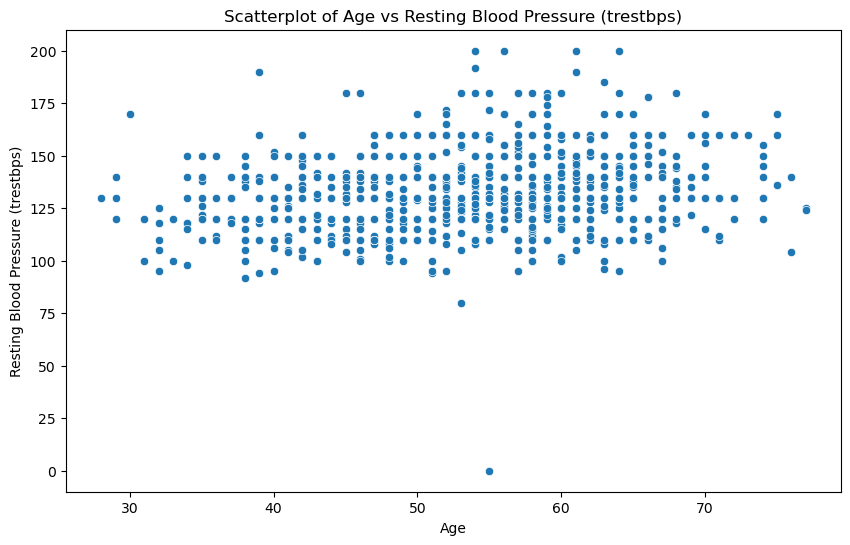

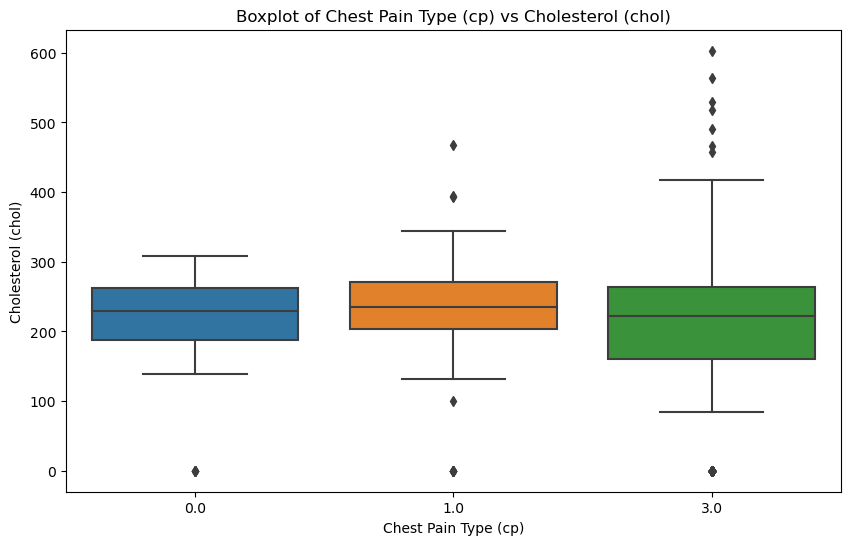

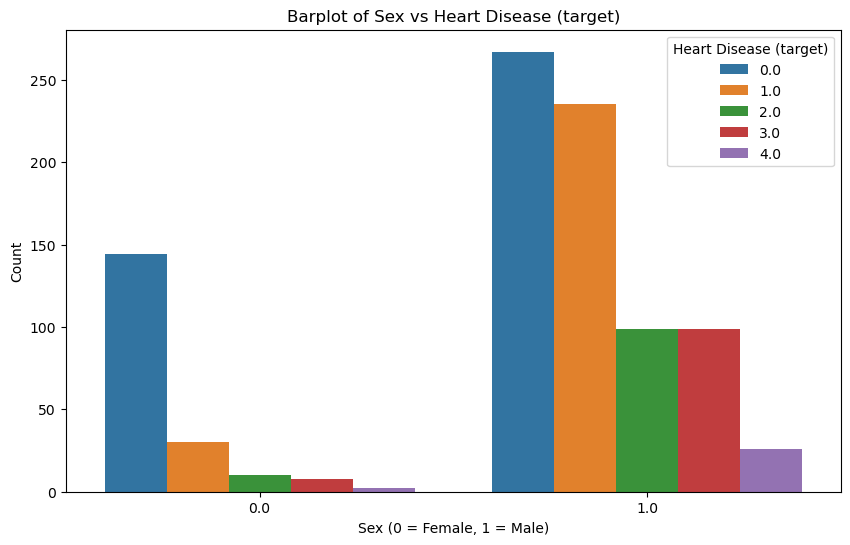

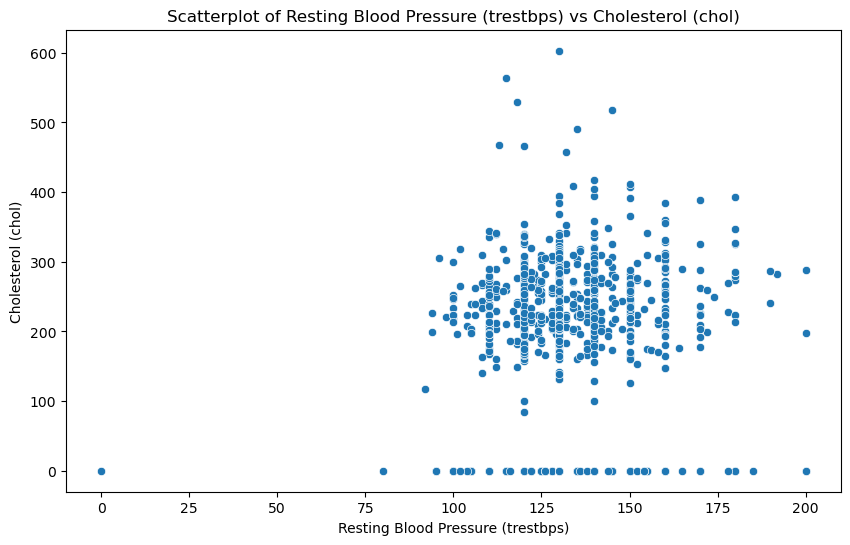

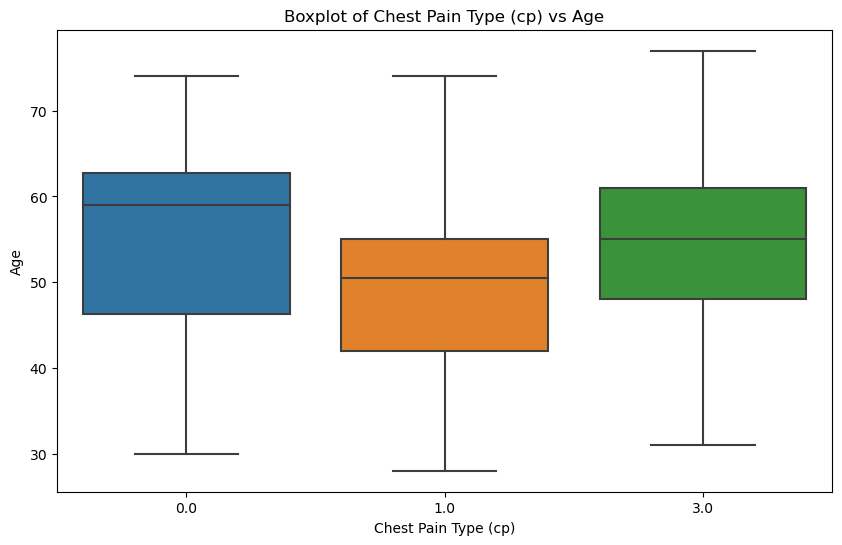

In [145]:
#Bivariate Analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned and normalized dataset
df = pd.read_csv("C://Users//hiba.abidelkarem//Downloads//heart_disease_cleaned.csv")

# 1. Scatterplot for Age vs Resting Blood Pressure (Numerical vs Numerical)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='trestbps', data=df)
plt.title('Scatterplot of Age vs Resting Blood Pressure (trestbps)')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.show()

# 2. Boxplot for Chest Pain Type (cp) vs Cholesterol (chol) (Categorical vs Numerical)
plt.figure(figsize=(10, 6))
sns.boxplot(x='cp', y='chol', data=df)
plt.title('Boxplot of Chest Pain Type (cp) vs Cholesterol (chol)')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Cholesterol (chol)')
plt.show()

# 3. Barplot for Sex vs Heart Disease (Categorical vs Categorical)
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=df)
plt.title('Barplot of Sex vs Heart Disease (target)')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease (target)', loc='upper right')
plt.show()

# 4. Scatterplot for Resting Blood Pressure (trestbps) vs Cholesterol (chol) (Numerical vs Numerical)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trestbps', y='chol', data=df)
plt.title('Scatterplot of Resting Blood Pressure (trestbps) vs Cholesterol (chol)')
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Cholesterol (chol)')
plt.show()

# 5. Boxplot for Chest Pain Type (cp) vs Age (Categorical vs Numerical)
plt.figure(figsize=(10, 6))
sns.boxplot(x='cp', y='age', data=df)
plt.title('Boxplot of Chest Pain Type (cp) vs Age')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Age')
plt.show()


<div dir="rtl">
## Bivariate Analysis, ויזואליזציות עם תובנות:

א. **תרשים הפיזור מציג את הקשר בין גיל (Age) ללחץ דם במנוחה (Resting Blood Pressure - trestbps)**:
1. **התפלגות כללית**:
   - הערכים נעים בעיקר בין גילאים 30 ל-70.
   - רוב ערכי לחץ הדם נעים בטווח שבין 100 ל-175 יחידות.
   - רוב הנקודות מתרכזות בין לחץ דם 125 ל-150 יחידות, ללא קשר ברור לגיל.
2. **ערכים חריגים**:
   - יש מספר ערכים חריגים בלחץ הדם, בעיקר ערכים נמוכים מאוד (כמו ערך שמתקרב לאפס) המופיעים במספר נקודות בודדות.
   - ערכים אלו עשויים להיות תוצאה של מדידה שגויה או נתונים שגויים ויש לבדוק אותם.
   
   **סיכום**: לא נראה שיש קשר מובהק בין גיל ללחץ הדם במנוחה, אבל יש ערכים שמצביעים על נתונים חריגים.

ב. **תרשים Boxplot מציג את ההשוואה בין סוגי כאב בחזה (Chest Pain Type - cp) לבין רמות הכולסטרול (chol)**:
1. **התפלגות כללית**:
   - לכל סוגי כאב החזה (0, 1, 3) טווחים דומים ברמות הכולסטרול, עם ריכוז גבוה סביב 200-300.
   - הערכים המרכזיים (חציון, IQR) בכל הקבוצות נמצאים קרוב זה לזה, כאשר החציון נע סביב 250 יחידות כולסטרול בכל הקבוצות.
2. **ערכים חריגים**:
   - יש מספר ערכים חריגים בכל הקבוצות, כאשר בקבוצות cp=0 ו-cp=1 יש ערכים חריגים נמוכים מאוד (כמעט אפס).
   - בקבוצה cp=3 יש ריכוז של ערכים חריגים גבוהים יותר, מעל 400 ואף מעל 500 יחידות כולסטרול, מה שמצביע על פיזור גבוה יותר בקטגוריה זו.
   
   **סיכום**: לא נראה שיש הבדל מובהק בין הקבוצות ברמות הכולסטרול, כי יש מספר ערכים חריגים בכל קבוצה.

ג. **הגרף מציג את ההתפלגות של מין (נשים=0, גברים=1) מול מחלת לב (target)**:
1. **נשים (Sex = 0)**:
   - מרבית הנשים (מעל 150) שייכות לקטגוריה 0 (ללא מחלת לב).
   - יש מעט מאוד נשים שיש להן דרגות מחלת לב גבוהות יותר, כאשר הדרגה הגבוהה ביותר (4) כמעט ולא מיוצגת.
2. **גברים (Sex = 1)**:
   - רוב הגברים שייכים לקטגוריה 0 (ללא מחלת לב) וגם לקטגוריה 1 (דרגת מחלה קלה), כאשר יש מספר רב של גברים בכל אחת משתי הקטגוריות האלו.
   - כמו כן, יש ייצוג ניכר של גברים עם דרגות מחלה 2 ו-3, אך דרגת המחלה 4 פחות נפוצה.
   
   **התפלגות חריגה**:
   - אצל נשים יש הבדל משמעותי בין הימצאות מחלת לב בהשוואה לגברים. הרבה יותר נשים נמצאות ללא מחלת לב (0) לעומת גברים, בעוד שיותר גברים נמצאים בדרגות חומרה גבוהות יותר.
   
   **סיכום**: הגרף מדגים באופן ברור שגברים נוטים יותר לסבול ממחלת לב לעומת נשים, ובעיקר בדרגות חומרה גבוהות יותר, אך רוב הנשים והגברים ללא מחלת לב נמצאים בדרגת חומרה 0.

ד. **תרשים פיזור (Scatterplot) של לחץ דם במנוחה (trestbps) מול כולסטרול (chol)**:
1. **היקף הנתונים המרכזי**:
   - מרבית הערכים של לחץ הדם במנוחה נעים בין 100 ל-150.
   - רוב הערכים של כולסטרול נעים בין 200 ל-350.
   - רוב הנקודות מתרכזות בטווח הזה, מה שמצביע על כך שזהו הטווח הנפוץ ביותר עבור הנתונים הנמדדים.
2. **ערכים חריגים**:
   - יש מספר נקודות עם ערכי כולסטרול גבוהים מעל 500, שהן ערכים חריגים.
   - יש ערכים חריגים מאוד נמוכים של כולסטרול שמתקרבים לאפס, מה שלא נפוץ מבחינה ביולוגית תקינה.
   - כמו כן, קיימים ערכי לחץ דם חריגים, מעל 175, כמו גם ערכי לחץ דם מאוד נמוכים שמתקרבים לאפס.
3. **התפלגות כללית**:
   - לא ניתן לזהות קשר לינארי ברור בין לחץ דם לכולסטרול. הנתונים מתפזרים בצורה רחבה ואקראית.
   - ייתכן שיש גורמים נוספים שמשפיעים על שניהם, ולא מדובר בקורלציה ישירה.
   
   **סיכום**:
   - אין קשר ברור וישיר בין לחץ דם במנוחה לרמת הכולסטרול על פי הגרף.
   - קיימים ערכים חריגים בולטים גם בלחץ הדם וגם בכולסטרול, שיכולים להיות מעניינים לבדיקה נוספת.

ה. **הגרף המוצג הוא תרשים Boxplot המתאר את הקשר בין סוג הכאב בחזה (cp) לגיל (Age)**:
1. **סוג כאב בחזה 0**:
   - הגיל החציוני עבור כאב cp הוא סביב 60.
   - טווח הגילאים נע בין כ-35 לכ-75.
   - קופסת הנתונים מצביעה על כך שרוב האנשים עם סוג זה של כאב בחזה נמצאים בטווח גילאים של 50 עד 65.
2. **סוג כאב בחזה 1**:
   - הגיל החציוני עבור סוג זה של כאב נמוך יותר בהשוואה לשאר, ועומד על כ-50.
   - טווח הגילאים רחב, נע בין גיל 30 - 75.
   - הקופסה צרה יחסית, ומרבית האנשים נמצאים בטווח של גילאי 45 עד 60.
3. **סוג כאב בחזה 3**:
   - הגיל החציוני עבור סוג זה של כאב הוא סביב 55.
   - טווח הגילאים נע בין 30 לכ-75.
   - הנתונים מפוזרים באופן רחב יחסית בטווח של 45 עד 65.
   
   **סיכום**:
   - יש הבדל בגיל החציוני בין סוגי הכאב בחזה, כאשר סוג 1 מתאפיין בגילאים נמוכים יותר באופן יחסי.
   - טווח הגילאים רחב בכל אחד מסוגי הכאב, אך ניתן לראות שסוגי כאב 0 ו-3 נוטים להיות נפוצים יותר אצל אנשים מבוגרים יותר, בעוד סוג 1 נפוץ יותר בגילאים צעירים.
</div>


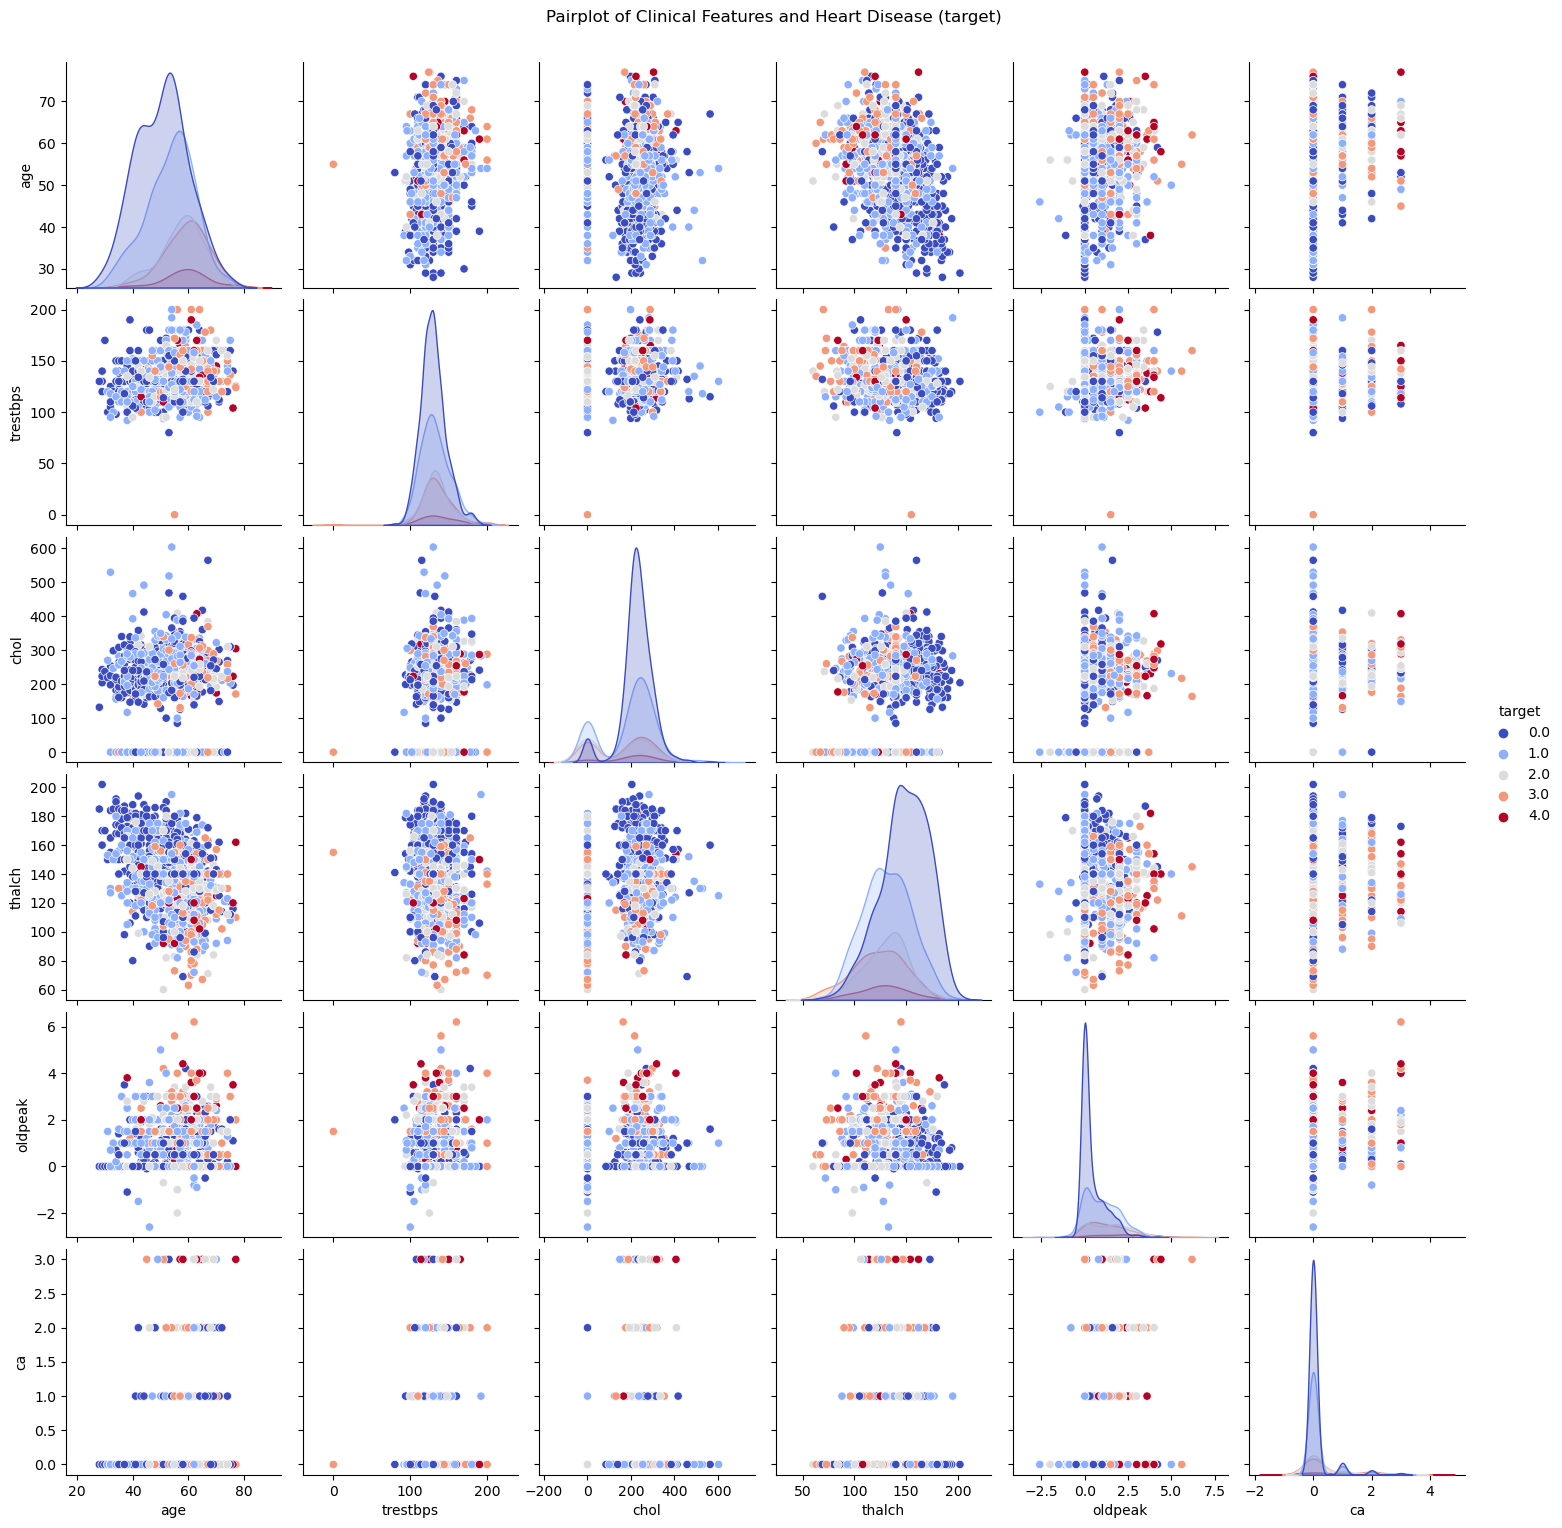

In [166]:
#Multivariate Analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned and normalized dataset
df = pd.read_csv("C://Users//hiba.abidelkarem//Downloads//heart_disease_cleaned.csv")

# Select numerical columns along with the target variable
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
columns_to_plot = numerical_columns + ['target']

# Pairplot to examine relationships between multiple numerical variables and target
sns.pairplot(df[columns_to_plot], hue='target', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot of Clinical Features and Heart Disease (target)', y=1.02)
plt.show()


<div dir="rtl">
## Multivariate Analysis

**ו. גרף Pairplot המציג את ההתפלגויות והקשרים בין משתנים קליניים שונים: גיל, לחץ דם במנוחה, רמות כולסטרול, קצב לב מרבי, ירידת ST במאמץ, מספר כלי דם עיקריים שצבעם נצבע, ואת מחלת הלב (target).**

### תובנות מהגרף:
1. **התפלגות של כל משתנה בנפרד:**
   - **גיל (age):** מתפלג בגאוסיאן (פעמון) כאשר רוב המשתתפים הם בגילאים 40-60.
   - **לחץ דם במנוחה (trestbps):** מתפלג עם ערכים שבין 100 ל-200, עם ריכוז גבוה יותר סביב 120-140.
   - **רמות כולסטרול (chol):** ערכים נעים בין 100 ל-600, עם ריכוז גבוה סביב 200-300.
   - **קצב לב מרבי (thalach):** מתפלג בגאוסיאן, עם רוב הערכים בין 100 ל-200 ושיא בסביבות 150-160.
   - **ירידת ST במאמץ (oldpeak):** רוב הערכים נמוכים מ-2, עם מעט ערכים קיצוניים.
   - **מספר כלי דם עיקריים (ca):** רוב הנתונים נמצאים בין 0 ל-3, אך יש גם כמה ערכים קיצוניים עד 4.

2. **קשרים בין המשתנים:**
   - **גיל (age) וכולסטרול (chol):** אין קשר ברור מאוד.
   - **קצב לב מרבי (thalach) וירידת ST במאמץ (oldpeak):** יש נטייה לערכים גבוהים יותר של ירידת ST במאמץ כאשר קצב הלב המרבי נמוך יותר, מה שעשוי לרמוז על קשר אפשרי.
   - **ca ו-oldpeak (ירידת ST במאמץ):** ישנן קבוצות מוגדרות היטב לערכים מסוימים של שני המשתנים, מה שעשוי להצביע על קשר כלשהו בין המדדים הללו לבין סיכון למחלת לב.

3. **קשרים עם target:**
   - **thalach ו-target:** קשר הפוך ברור, כאשר ערכים נמוכים של קצב לב מרבי מקושרים ל-target גבוה יותר (סיכון גבוה יותר למחלת לב).
   - **ירידת ST במאמץ ו-target:** ערכים גבוהים של ירידת ST במאמץ קשורים עם ערכים גבוהים יותר של target.
   - **ca (מספר כלי דם עיקריים שצבעם נצבע) ו-target:** נראה שיש קשר חזק בין ca ל-target, כאשר ערכים גבוהים יותר של ca (כמו 3 או 4) נוטים להיות מקושרים עם ערכים גבוהים יותר של target.

4. **ערכים חריגים:**
   - **chol (כולסטרול):** יש כמה ערכים חריגים (מעל 500), אשר יוצאים מחוץ לטווח הנפוץ.
   - **oldpeak (ירידת ST במאמץ):** ישנם כמה ערכים גבוהים במיוחד (מעל 5), שהם חריגים.
   - **ca:** נראה שיש ריכוז מוגבל של ערכים, אך ערך 4 הוא די חריג ומייצג מקרים נדירים יותר.

**סיכום:**
הגרף מצביע על כך שהמשתנים **thalach (קצב לב מרבי)**, **oldpeak (ירידת ST במאמץ)**, ו-**ca (מספר כלי דם עיקריים שצבעם נצבע)** הם המשתנים החזקים ביותר בקשר שלהם למחלת לב. קיימים גם ערכים חריגים במיוחד ב-**chol (כולסטרול)**, **oldpeak** ו-**ca**, אשר עשויים להוות נתוני קצה (outliers).
</div>

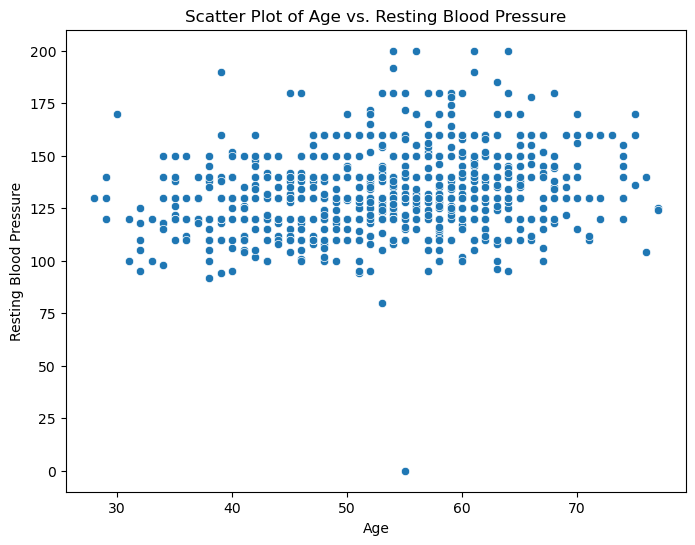

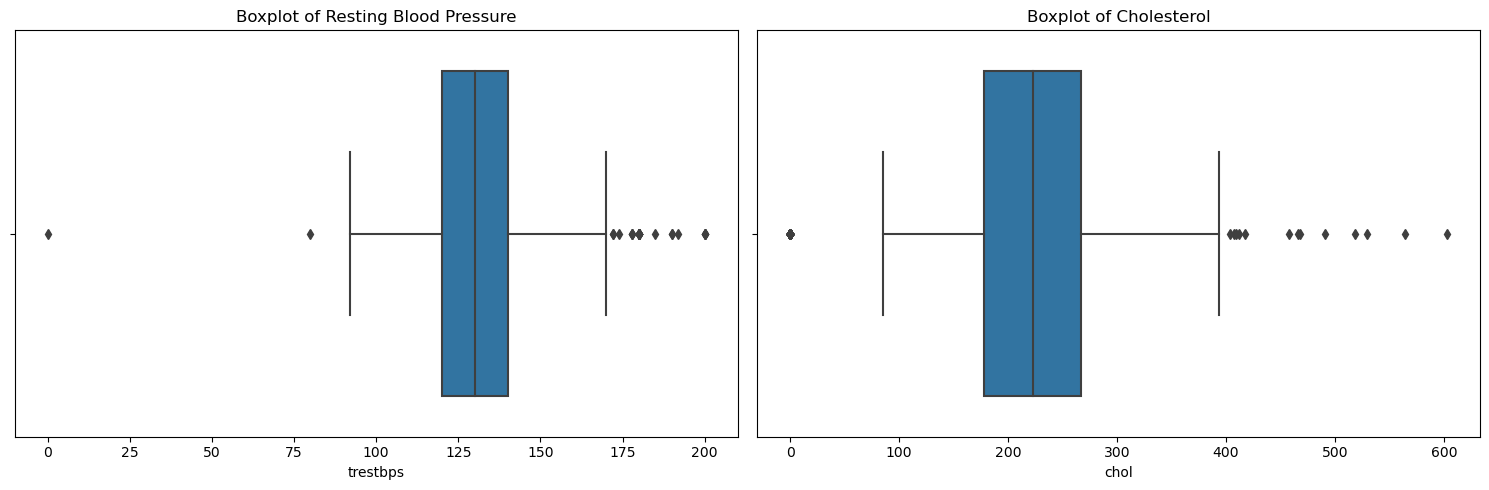

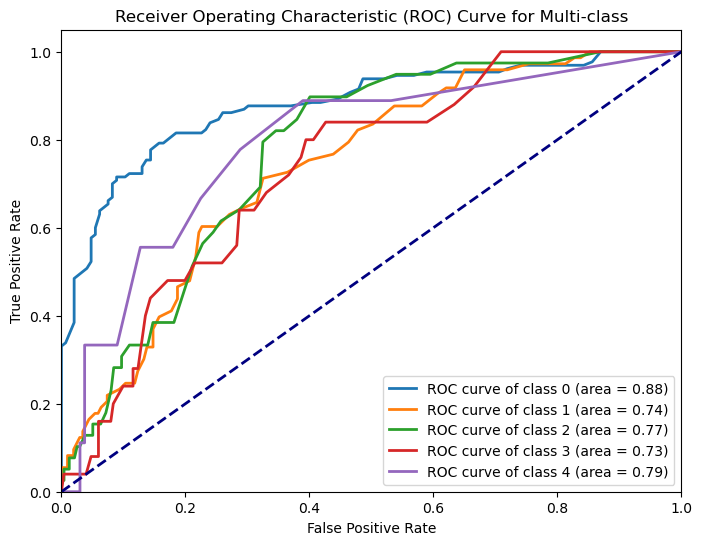

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import numpy as np

#print("Column names:", df.columns)


# Scatter graph between age and resting blood pressure
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['age'], y=df['trestbps'])
plt.title('Scatter Plot of Age vs. Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

# Boxplot for blood pressure and cholesterol
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['trestbps'])
plt.title('Boxplot of Resting Blood Pressure')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['chol'])
plt.title('Boxplot of Cholesterol')
plt.tight_layout()
plt.show()

#Calculating and displaying ROC AUC for multi-class classification and preparing data for the model
X = df.drop(columns=['target'])
y = df['target']
# Convert the answers to binary encoding for ROC
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=0)
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Creat model
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_scaled, y_train)
y_prob = model.predict_proba(X_test_scaled)# Prediction and evaluation of the model

# ROC AUC calculation
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_prob[i][:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve of class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc='lower right')
plt.show()


<div dir="rtl">

## ויזואליזציות מרכזיות נוספות (בנוסף לויזואליזציות שהוצגו מקודם):

### ז. הגרף מראה פיזור של גיל מול לחץ דם במנוחה:
1. **פיזור כללי:** ניתן לראות שהנתונים מרוכזים בעיקר בין גילאי 40 ל-70, עם לחץ דם שנע בין 100 ל-175 מ"מ. הפיזור יחסית אחיד בין גילאים אלו, כאשר רוב המדידות נמצאות בטווח 120-160.
2. **ערכים חריגים:**
   - ישנם ערכים חריגים נמוכים מאוד של לחץ דם, מתחת ל-75, כאשר יש אפילו נקודה בודדת עם לחץ דם של 0. זהו כנראה ערך חריג שנובע מטעות במדידה.
   - יש מספר נקודות עם לחץ דם גבוה מ-200, שנחשבות כערכים חריגים.
3. **מגמת הקשר:** נראה שאין מגמה ברורה של עלייה או ירידה בלחץ הדם עם העלייה בגיל. הנתונים מראים פיזור רחב בכל הגילאים, ולכן לא ניתן להסיק קשר חזק בין גיל ללחץ דם במנוחה מתוך הגרף הזה.

**סיכום:** התפלגות הנתונים נראית די הומוגנית בין גילאי 40 ל-70, אך חשוב לשים לב לערכים החריגים שהתגלו בלחץ הדם.

### ח. הגרף מכיל שני תרשימי Boxplot, אחד עבור לחץ דם במנוחה (trestbps) והשני עבור רמת כולסטרול (chol). הנה תובנות מהגרף:

1. **Boxplot של לחץ דם במנוחה (trestbps):**
   - **התפלגות מרכזית:** רוב הנתונים נעים בטווח של כ-120 - 140 מ"מ כספית, עם חציון שנראה באזור 130.
   - **ערכים חריגים:** ישנם כמה ערכים חריגים נמוכים (בערך 0 ו-75 מ"מ כספית), וכן ערכים חריגים גבוהים מעל 175. הערך הקיצוני ביותר קרוב ל-200.

2. **Boxplot של כולסטרול (chol):**
   - **התפלגות מרכזית:** רוב הנתונים נעים בטווח של 200 עד 300 מ"ג/ד"ל, עם חציון שנראה באזור 240.
   - **ערכים חריגים:** ישנם מספר ערכים חריגים מעל 400, והערך החריג ביותר מתקרב ל-600. כמו כן, יש ערך חריג נמוך מאוד, שנראה כ-0, שעשוי להיות תוצאה שגויה או חסרה.

**סיכום:** שני התרשימים מראים התפלגות די תקינה עם מספר ערכים חריגים בקצוות, במיוחד בערכי לחץ דם נמוכים וערכי כולסטרול גבוהים. הערכים החריגים דורשים תשומת לב נוספת, שכן הם עשויים להיות תוצאה של טעויות במדידה או להצביע על מצבים חריגים בריאותיים.

## התובנות העיקריות מגרף ROC הן:

**מחלקה 0 זוהתה באופן הטוב ביותר**, עם ביצועים גבוהים (AUC=0.88).

**מחלקות 1-4 מציגות ביצועים בינוניים**, עם צורך בשיפור כדי להשיג זיהוי טוב יותר.


הגרף מציין שהדגם מעל לקו האלכסוני, כלומר טוב מזיהוי אקראי, אך ישנן הזדמנויות לשיפור בזיהוי מחלקות מסוימות
</div>
